###**Importing Libraries** 

In [264]:
import requests
import pandas as pd
import bs4
from bs4 import BeautifulSoup


    This cofiguration helps to analyze extracted data by making viewing much better

In [265]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

###**Data Loading**

In [266]:
url="https://mckennas.guides.ie/100bestplacestostay"
response = requests.get(url)
content = response.text
soup = BeautifulSoup(content, "lxml")
print(response)

<Response [200]>


###**Analyzing Content**

In [267]:
soup

<!DOCTYPE html>
<!--[if IEMobile 7]><html class="iem7"  lang="en" dir="ltr"><![endif]--><!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7"  lang="en" dir="ltr"><![endif]--><!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8"  lang="en" dir="ltr"><![endif]--><!--[if IE 8]><html class="lt-ie9"  lang="en" dir="ltr"><![endif]--><!--[if (gte IE 9)|(gt IEMobile 7)]><!--><html dir="ltr" lang="en" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:dc="http://purl.org/dc/terms/" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:og="http://ogp.me/ns#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:sioc="http://rdfs.org/sioc/ns#" xmlns:sioct="http://rdfs.org/sioc/types#" xmlns:skos="http://www.w3.org/2004/02/skos/core#" xmlns:xsd="http://www.w3.org/2001/XMLSchema#"><!--<![endif]-->
<head profile="http://www.w3.org/1999/xhtml/vocab">
<meta charset="utf-8"/>
<meta content="Drupal 7 (http://drupal.org)" name="Generator"/>
<link href="/100bestplacestostay" rel="canonical"/>
<li

    My thought process over here was to get the main class that will help me optimize the whole useful data and help me work further.

In [268]:
data =  soup.findAll("div", {"class" : "view-content"})
len(data)

2

    Here we get to know about the types of elements present in the content which will let us create conditions to read it.

In [269]:
data = data[1]
type(data)

bs4.element.Tag

In [270]:
len(data)

161

    Here, I observed that bs4.element.Tag is useful for our data extraction hence we create a if-else condition to read the data.   

In [271]:
for d in data:
  print(d)
  print(type(d))
  print("----")



<class 'bs4.element.NavigableString'>
----
<h3><div class="field field-name-taxonomy-vocabulary-4 field-type-taxonomy-term-reference field-label-hidden"><div class="field-items"><div class="field-item even">Carlow</div></div></div></h3>
<class 'bs4.element.Tag'>
----


<class 'bs4.element.NavigableString'>
----
<div class="views-row views-row-1">
<div> <div><a href="/recommendations/kilgraney-house"><img height="420" src="https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/kilgraney-houseimg_0233.png?itok=AdtqXYLZ" typeof="foaf:Image" width="420"/></a></div> </div>
<div class="views-field views-field-title"> <span class="field-content"><a href="/recommendations/kilgraney-house">Kilgraney House</a></span> </div>
<div class="field field-name-field-address field-type-text-long field-label-hidden">
    Bagenalstown, County Carlow  </div>
</div>
<class 'bs4.element.Tag'>
----


<class 'bs4.element.NavigableString'>
----
<h3><div class="field field-name-taxonom

###**Data Scraping**

In [272]:
county = ""
place = ""
address = ""
img = ""
df = pd.DataFrame()
for d in data:
  if type(d) is not bs4.element.NavigableString:
    if d.find('div', {"class":"field-item even"}) is not None:
      county =  d.find('div', {"class":"field-item even"}).text
      continue
    else:
      county = county
    if d.find('span', {"class":"field-content"}) is not None:
      place = d.find('span', {"class":"field-content"}).text
    if d.find('div', {"class":"field field-name-field-address field-type-text-long field-label-hidden"}) is not None:
      add = d.find('div', {"class":"field field-name-field-address field-type-text-long field-label-hidden"}).text
      address = add.strip()

    print("County:"+county)
    print("Place: "+place)
    print("Address: "+address)
    print("Img URL: "+ str(d.find('img')['src']))
    df = df.append({'County' : county.strip(), 'Place' : place.strip(), 'Address' : address.strip(), 'ImgURL': str(d.find('img')['src']).strip() }, ignore_index = True)
    print("----------")

County:Carlow
Place: Kilgraney House
Address: Bagenalstown, County Carlow
Img URL: https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/kilgraney-houseimg_0233.png?itok=AdtqXYLZ
----------
County:Clare
Place: Armada Hotel
Address: Spanish Point, Miltown Malbay, Co Clare
Img URL: https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/armada-spanish-point-dsc06463.jpg?itok=Lr0MODSi
----------
County:Clare
Place: Ballinsheen House
Address: Lisdoonvarna, County Clare
Img URL: https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/ballinsheen7.png?itok=lh8nOc69
----------
County:Clare
Place: Sheedy's
Address: Lisdoonvarna, County Clare.
Img URL: https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/sheedys-hotelimg_2651.png?itok=K5pEdvwv
----------
County:Clare
Place: Gregans Castle
Address: Ballyvaughan, County Clare
Img URL: https://mckennas.guides.ie/sites/guides.ie/files/styles/320

In [273]:
df

,County,Place,Address,ImgURL
0,Carlow,Kilgraney House,"Bagenalstown, County Carlow",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/kilgraney-houseimg_0233.png?itok=AdtqXYLZ
1,Clare,Armada Hotel,"Spanish Point, Miltown Malbay, Co Clare",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/armada-spanish-point-dsc06463.jpg?itok=Lr0MODSi
2,Clare,Ballinsheen House,"Lisdoonvarna, County Clare",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/ballinsheen7.png?itok=lh8nOc69
3,Clare,Sheedy's,"Lisdoonvarna, County Clare.",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/sheedys-hotelimg_2651.png?itok=K5pEdvwv
4,Clare,Gregans Castle,"Ballyvaughan, County Clare",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/gregans_castle_main.jpg?itok=hmTKFCgx
...,...,...,...,...
58,Wexford,Kelly's Resort Hotel,"Rosslare, County Wexford",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/kellys-img_5701.png?itok=iKFatuEb
59,Wexford,Monart,"The Still, Enniscorthy, County Wexford.",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/monart_8609.jpg?itok=_dZU1GZL
60,Wexford,Aldridge Lodge,"Duncannon, New Ross, Co.Wexford.",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/aldridge-lodge.png?itok=MQb5t1xc
61,Wicklow,Brook Lodge,"The Strawberry Tree Restaurant, Brook Lodge, Macreddin Village, Aughrim, Co Wicklow",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/brooklodge2_0.jpg?itok=7JB-oQty


    Here, after cross verifying the data I found out that I can increase more data by inspecting every URL from PageURL column and deviced a method.

In [274]:
def getInfo(inputURL):
  response = requests.get(inputURL)
  content = response.text
  soup = BeautifulSoup(content, "lxml")
  lat = (soup.find("meta",{"itemprop":"latitude"})['content'])
  lon = (soup.find("meta",{"itemprop":"longitude"})['content'])
  phone = soup.find("div",{"class":"field field-name-field-phone field-type-text field-label-hidden"}).text
  if soup.find("div",{"class":"field field-name-field-facebook field-type-link-field field-label-hidden"}) is not None:
    facebook = soup.find("div",{"class":"field field-name-field-facebook field-type-link-field field-label-hidden"}).find('a',href=True)['href']
  else:
    facebook = None
  if soup.find("div",{"class":"field field-name-field-twitter field-type-link-field field-label-hidden"}) is not None:
    twitter = soup.find("div",{"class":"field field-name-field-twitter field-type-link-field field-label-hidden"}).find('a',href=True)['href']
  else:
    twitter = None
  return lat, lon, phone, facebook, twitter

**Testing the function**

In [275]:
getInfo('https://mckennas.guides.ie/recommendations/huntsman-inn')

('53.281624',
 '-9.034308',
 '+ 353 91 562849',
 'https://www.facebook.com/huntsmangalway',
 'https://twitter.com/TheHuntsmanInn')

**Applying the function**

In [276]:
county = ""
place = ""
address = ""
img = ""
df2 = pd.DataFrame()
for d in data:
  if type(d) is not bs4.element.NavigableString:
    # print("content:"+str(d))
    if d.find('div', {"class":"field-item even"}) is not None:
      county =  d.find('div', {"class":"field-item even"}).text
      continue
    else:
      county = county
    if d.find('span', {"class":"field-content"}) is not None:
      place = d.find('span', {"class":"field-content"}).text
    if d.find('div', {"class":"field field-name-field-address field-type-text-long field-label-hidden"}) is not None:
      add = d.find('div', {"class":"field field-name-field-address field-type-text-long field-label-hidden"}).text
      address = add.strip()

    print("County:"+county)
    print("Place: "+place)
    print("Address: "+address)
    imgurl = str(d.find('img')['src'])
    print("Img URL: "+ imgurl)
    pageurl = "https://mckennas.guides.ie"+str(d.find('a')['href'])
    print("PageURL:"+ pageurl)
    lat, lon, phone, facebook, twitter = getInfo(pageurl)
    df2 = df2.append({'County' : county.strip(), 'Place' : place.strip(), 'Address' : address.strip(), 'ImgURL': imgurl ,
                      "PageURL" : pageurl ,
                      'Latitude' : lat, 'Longitude': lon, "Phone" : phone, "FacebookURL" : facebook, "TwitterURL" : twitter}, ignore_index = True)
    print("----------")

County:Carlow
Place: Kilgraney House
Address: Bagenalstown, County Carlow
Img URL: https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/kilgraney-houseimg_0233.png?itok=AdtqXYLZ
PageURL:https://mckennas.guides.ie/recommendations/kilgraney-house
----------
County:Clare
Place: Armada Hotel
Address: Spanish Point, Miltown Malbay, Co Clare
Img URL: https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/armada-spanish-point-dsc06463.jpg?itok=Lr0MODSi
PageURL:https://mckennas.guides.ie/recommendations/armada-hotel
----------
County:Clare
Place: Ballinsheen House
Address: Lisdoonvarna, County Clare
Img URL: https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/ballinsheen7.png?itok=lh8nOc69
PageURL:https://mckennas.guides.ie/recommendations/ballinsheen-house
----------
County:Clare
Place: Sheedy's
Address: Lisdoonvarna, County Clare.
Img URL: https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/publi

**New Database**

In [277]:
df2.head()

,County,Place,Address,ImgURL,PageURL,Latitude,Longitude,Phone,FacebookURL,TwitterURL
0,Carlow,Kilgraney House,"Bagenalstown, County Carlow",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/kilgraney-houseimg_0233.png?itok=AdtqXYLZ,https://mckennas.guides.ie/recommendations/kilgraney-house,52.653333,-6.957222,059-977 5283,https://www.facebook.com/kilgraneyhouse,https://twitter.com/KilgraneyHouse
1,Clare,Armada Hotel,"Spanish Point, Miltown Malbay, Co Clare",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/armada-spanish-point-dsc06463.jpg?itok=Lr0MODSi,https://mckennas.guides.ie/recommendations/armada-hotel,52.845234,-9.436725,+ 353 65 707 9000,https://www.facebook.com/ArmadaHotel,https://twitter.com/armadahotel
2,Clare,Ballinsheen House,"Lisdoonvarna, County Clare",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/ballinsheen7.png?itok=lh8nOc69,https://mckennas.guides.ie/recommendations/ballinsheen-house,53.034166,-9.287993,+ 353 65 7074806,https://www.facebook.com/Ballinsheen-House-Gardens-Bed-Breakfast-Lisdoonvarna-Ireland-111456575537432,https://twitter.com/MaryBallinsheen
3,Clare,Sheedy's,"Lisdoonvarna, County Clare.",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/sheedys-hotelimg_2651.png?itok=K5pEdvwv,https://mckennas.guides.ie/recommendations/sheedys,53.026707,-9.290235,+353 65 707 4026,https://www.facebook.com/SheedysHotel/,https://twitter.com/sheedyshotel
4,Clare,Gregans Castle,"Ballyvaughan, County Clare",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/gregans_castle_main.jpg?itok=hmTKFCgx,https://mckennas.guides.ie/recommendations/gregans-castle,53.076944,-9.186222,+ 353 65 707 7005,None,None


In [278]:
df2.columns

Index(['County', 'Place', 'Address', 'ImgURL', 'PageURL', 'Latitude',
       'Longitude', 'Phone', 'FacebookURL', 'TwitterURL'],
      dtype='object')

In [279]:
abc = "mailto:info@themetropolehotel.ie?subject=Enquiry%20regarding%20The%20Metropole%20Hotel%20via%20Guides.ie%20the%20website%20by%20John%20and%20Sally%20McKenna"

In [280]:
abc[0:10]

'mailto:inf'

In [281]:
abc[abc.index(":")+1:abc.index("?")]

'info@themetropolehotel.ie'

###**Feature Engineering**

In [282]:
from geopy.geocoders import Nominatim

In [283]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [284]:
geo_df = pd.DataFrame(df2, columns =['Latitude', 'Longitude'])
geo_df.head()

,Latitude,Longitude
0,52.653333,-6.957222
1,52.845234,-9.436725
2,53.034166,-9.287993
3,53.026707,-9.290235
4,53.076944,-9.186222


In [285]:
Latitude = "25.594095"
Longitude = "85.137566"
 
location = geolocator.reverse(Latitude+","+Longitude)
location

Location(Patna, Patna Rural, Patna District, Bihar, 800001, India, (25.594022944993192, 85.13756101933402, 0.0))

In [286]:
df2['detailedAddress'] = df2.apply(lambda x: geolocator.reverse(x['Latitude']+","+x['Longitude']),axis=1)

In [287]:
"Leinster".isalpha()

True

In [288]:
"Leinster".isalnum()

True

In [289]:
"Leinster".isnumeric()

False

In [290]:
df2

,County,Place,Address,ImgURL,PageURL,Latitude,Longitude,Phone,FacebookURL,TwitterURL,detailedAddress
0,Carlow,Kilgraney House,"Bagenalstown, County Carlow",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/kilgraney-houseimg_0233.png?itok=AdtqXYLZ,https://mckennas.guides.ie/recommendations/kilgraney-house,52.653333,-6.957222,059-977 5283,https://www.facebook.com/kilgraneyhouse,https://twitter.com/KilgraneyHouse,"(L7021, Kilgraney, Sliguff ED, The Municipal District of Muinebeag, County Carlow, Leinster, R21 DR77, Éire / Ireland, (52.65527583694795, -6.957287324421228))"
1,Clare,Armada Hotel,"Spanish Point, Miltown Malbay, Co Clare",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/armada-spanish-point-dsc06463.jpg?itok=Lr0MODSi,https://mckennas.guides.ie/recommendations/armada-hotel,52.845234,-9.436725,+ 353 65 707 9000,https://www.facebook.com/ArmadaHotel,https://twitter.com/armadahotel,"(Armada Hotel, R482, Milltown Malbay ED, West Clare Municipal District, County Clare, Munster, V95 V9Y8, Éire / Ireland, (52.845206000000005, -9.436696479278556))"
2,Clare,Ballinsheen House,"Lisdoonvarna, County Clare",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/ballinsheen7.png?itok=lh8nOc69,https://mckennas.guides.ie/recommendations/ballinsheen-house,53.034166,-9.287993,+ 353 65 7074806,https://www.facebook.com/Ballinsheen-House-Gardens-Bed-Breakfast-Lisdoonvarna-Ireland-111456575537432,https://twitter.com/MaryBallinsheen,"(N67, Lisdoonvarna ED, West Clare Municipal District, County Clare, Munster, V95 RWF5, Éire / Ireland, (53.0342449, -9.288358))"
3,Clare,Sheedy's,"Lisdoonvarna, County Clare.",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/sheedys-hotelimg_2651.png?itok=K5pEdvwv,https://mckennas.guides.ie/recommendations/sheedys,53.026707,-9.290235,+353 65 707 4026,https://www.facebook.com/SheedysHotel/,https://twitter.com/sheedyshotel,"(Hydro Hotel, R476, Lisdoonvarna ED, West Clare Municipal District, County Clare, Munster, V95 HF5X, Éire / Ireland, (53.026896199999996, -9.290375832592332))"
4,Clare,Gregans Castle,"Ballyvaughan, County Clare",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/gregans_castle_main.jpg?itok=hmTKFCgx,https://mckennas.guides.ie/recommendations/gregans-castle,53.076944,-9.186222,+ 353 65 707 7005,None,None,"(N67, Rathborney ED, West Clare Municipal District, County Clare, Munster, H91 CF60, Éire / Ireland, (53.0769477801668, -9.186314957738134))"
...,...,...,...,...,...,...,...,...,...,...,...
58,Wexford,Kelly's Resort Hotel,"Rosslare, County Wexford",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/kellys-img_5701.png?itok=iKFatuEb,https://mckennas.guides.ie/recommendations/kellys-resort-hotel,52.275477,-6.388022,+ 353 53 913 2114,https://www.facebook.com/Kellys-Resort-Hotel-306173243827,None,"(Kelly's Resort Hotel, Strand Road, Rosslare ED, The Borough District of Wexford, County Wexford, Leinster, Éire / Ireland, (52.27529115, -6.387752321560848))"
59,Wexford,Monart,"The Still, Enniscorthy, County Wexford.",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/monart_8609.jpg?itok=_dZU1GZL,https://mckennas.guides.ie/recommendations/monart,52.506243,-6.610455,+353 53-923 8999,https://www.facebook.com/monartspa,https://twitter.com/monartspa,"(Killoughrum ED, The Municipal District of Enniscorthy, County Wexford, Leinster, Y21 XP63, Éire / Ireland, (52.506279065395546, -6.610047905672178))"
60,Wexford,Aldridge Lodge,"Duncannon, New Ross, Co.Wexford.",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/aldridge-lodge.png?itok=MQb5t1xc,https://mckennas.guides.ie/recommendations/aldridge-lodge,52.2161832,-6.9094565,00353 51 389116,None,None,"(Aldridge Lodge, R737, Rathroe ED, The Municipal District of New Ross, County Wexford, Leinster, Y34 CY63, Éire / Ireland, (52

In [291]:
def get_eircode(add):
  eircode = add[(add.rfind(", É")-8):add.rfind(", É")].strip()
  if(eircode.isalpha() == True and eircode.isnumeric() == False):
    return 'N/A'
  elif(eircode.isalpha() == False and eircode.isnumeric() == False):
    return eircode
  else:
    return 'N/A'

In [292]:
c = get_eircode("L7021, Kilgraney, Sliguff ED, The Municipal District of Muinebeag, County Carlow, Leinster, R21 DR77, Éire / Ireland")
print(c)

R21 DR77


In [293]:
df2['EIRCODE'] = df2.apply(lambda x: get_eircode(str(x['detailedAddress'])),axis=1)

 **I extracted EIR of each place from the location data I received from geopy.**

In [294]:
df2.head()

,County,Place,Address,ImgURL,PageURL,Latitude,Longitude,Phone,FacebookURL,TwitterURL,detailedAddress,EIRCODE
0,Carlow,Kilgraney House,"Bagenalstown, County Carlow",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/kilgraney-houseimg_0233.png?itok=AdtqXYLZ,https://mckennas.guides.ie/recommendations/kilgraney-house,52.653333,-6.957222,059-977 5283,https://www.facebook.com/kilgraneyhouse,https://twitter.com/KilgraneyHouse,"(L7021, Kilgraney, Sliguff ED, The Municipal District of Muinebeag, County Carlow, Leinster, R21 DR77, Éire / Ireland, (52.65527583694795, -6.957287324421228))",R21 DR77
1,Clare,Armada Hotel,"Spanish Point, Miltown Malbay, Co Clare",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/armada-spanish-point-dsc06463.jpg?itok=Lr0MODSi,https://mckennas.guides.ie/recommendations/armada-hotel,52.845234,-9.436725,+ 353 65 707 9000,https://www.facebook.com/ArmadaHotel,https://twitter.com/armadahotel,"(Armada Hotel, R482, Milltown Malbay ED, West Clare Municipal District, County Clare, Munster, V95 V9Y8, Éire / Ireland, (52.845206000000005, -9.436696479278556))",V95 V9Y8
2,Clare,Ballinsheen House,"Lisdoonvarna, County Clare",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/ballinsheen7.png?itok=lh8nOc69,https://mckennas.guides.ie/recommendations/ballinsheen-house,53.034166,-9.287993,+ 353 65 7074806,https://www.facebook.com/Ballinsheen-House-Gardens-Bed-Breakfast-Lisdoonvarna-Ireland-111456575537432,https://twitter.com/MaryBallinsheen,"(N67, Lisdoonvarna ED, West Clare Municipal District, County Clare, Munster, V95 RWF5, Éire / Ireland, (53.0342449, -9.288358))",V95 RWF5
3,Clare,Sheedy's,"Lisdoonvarna, County Clare.",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/sheedys-hotelimg_2651.png?itok=K5pEdvwv,https://mckennas.guides.ie/recommendations/sheedys,53.026707,-9.290235,+353 65 707 4026,https://www.facebook.com/SheedysHotel/,https://twitter.com/sheedyshotel,"(Hydro Hotel, R476, Lisdoonvarna ED, West Clare Municipal District, County Clare, Munster, V95 HF5X, Éire / Ireland, (53.026896199999996, -9.290375832592332))",V95 HF5X
4,Clare,Gregans Castle,"Ballyvaughan, County Clare",https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/gregans_castle_main.jpg?itok=hmTKFCgx,https://mckennas.guides.ie/recommendations/gregans-castle,53.076944,-9.186222,+ 353 65 707 7005,None,None,"(N67, Rathborney ED, West Clare Municipal District, County Clare, Munster, H91 CF60, Éire / Ireland, (53.0769477801668, -9.186314957738134))",H91 CF60


In [295]:
abc="(Ballyknocken House, L1096, Glenealy ED, The Municipal District of Wicklow, County Wicklow, Leinster, A67 DR74, Éire / Ireland, (52.97676, -6.1429492))"
abc[(abc.rfind(", É",)-8):abc.rfind(", É")]

'A67 DR74'

###**Data Analysis**

>>**Q.1) Which county has the most places to visit?**

In [296]:
df.groupby(["Place","County"]).size().reset_index(name="Time")


,Place,County,Time
0,Aldridge Lodge,Wexford,1
1,Armada Hotel,Clare,1
2,Avalon House Hotel,Kilkenny,1
3,Ballinsheen House,Clare,1
4,Ballyknocken House,Wicklow,1
...,...,...,...
58,The Ross,Kerry,1
59,The Stop B&B,Galway,1
60,The Twelve Hotel,Galway,1
61,Top of the Rock Pod Pairc & Walking Centre,Cork,1


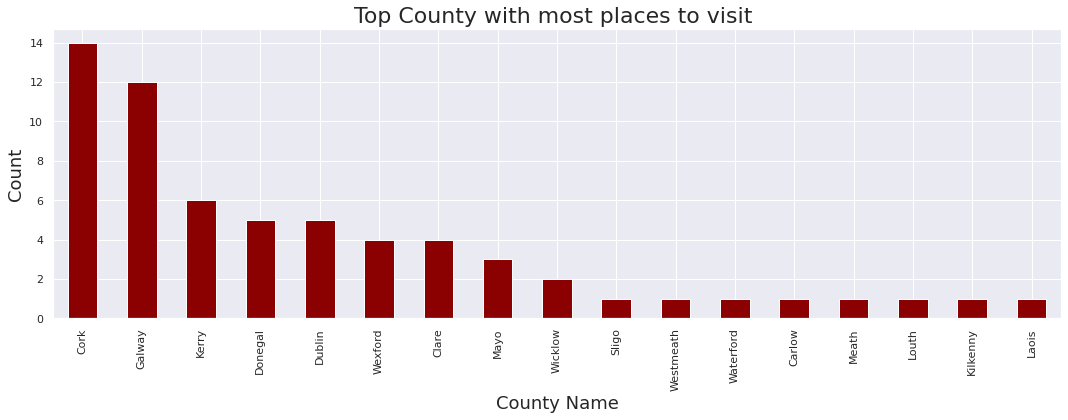

In [297]:
plt.figure(figsize=(15,6))
df2['County'].value_counts()[:65].plot(kind='bar', color = 'darkred')
plt.xlabel("County Name", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Top County with most places to visit ", fontsize=22)
plt.show()

>>**Q.2) Where are the places in the map?**

In [298]:
import plotly.express as px
import pandas as pd



fig = px.scatter_geo(df2,lat='Latitude',lon='Longitude', hover_name="Place")
fig.update_layout(
    autosize=True,
    height=600,
    geo=dict(
        center=dict(
            lat=53.384696,
            lon=-7.816035
        ),
        projection_scale=35
    ),
    title = 'Tourist places in Ireland',
    title_x=0.5
)
fig.show()

>>**Q.3)Representing Lattitude and Longitude in Google Maps Format?** 
    
    This map is better than the one above since it gives a visual represent of the road and routes that we can follow from one place to another.

In [299]:
color_scale = [(0, 'orange'), (1,'red')]
df3 = df2.copy()
df3["Latitude"] = pd.to_numeric(df3["Latitude"])
df3["Longitude"] = pd.to_numeric(df3["Longitude"])
fig = px.scatter_mapbox(df3, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Address", 
                        hover_data=["Address", "Place"],
                        # color="Listed",
                        color_continuous_scale=color_scale,
                        # size="Listed",
                        zoom=6, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

###**Dataframe Migration on SQL**

In [300]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [301]:
import sqlite3
conn = sqlite3.connect('database')
c = conn.cursor()

In [302]:
c.execute('CREATE TABLE IF NOT EXISTS tour("county", "Place", "Address", "ImgURL", "PageURL", "Latitude", "Longitude", "Phone", "FacebookURL", "TwitterURL")')
conn.commit()

In [303]:
df2 = df2.applymap(str)

In [304]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   County           63 non-null     object
 1   Place            63 non-null     object
 2   Address          63 non-null     object
 3   ImgURL           63 non-null     object
 4   PageURL          63 non-null     object
 5   Latitude         63 non-null     object
 6   Longitude        63 non-null     object
 7   Phone            63 non-null     object
 8   FacebookURL      63 non-null     object
 9   TwitterURL       63 non-null     object
 10  detailedAddress  63 non-null     object
 11  EIRCODE          63 non-null     object
dtypes: object(12)
memory usage: 6.0+ KB


In [305]:
df2.to_sql('tour', conn, if_exists='replace', index = False)

In [306]:
c.execute("SELECT * FROM tour")
for row in c.fetchall():
    print (row)

('Carlow', 'Kilgraney House', 'Bagenalstown, County Carlow', 'https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/kilgraney-houseimg_0233.png?itok=AdtqXYLZ', 'https://mckennas.guides.ie/recommendations/kilgraney-house', '52.653333', '-6.957222', '059-977 5283', 'https://www.facebook.com/kilgraneyhouse', 'https://twitter.com/KilgraneyHouse', 'L7021, Kilgraney, Sliguff ED, The Municipal District of Muinebeag, County Carlow, Leinster, R21 DR77, Éire / Ireland', 'R21 DR77')
('Clare', 'Armada Hotel', 'Spanish Point, Miltown Malbay, Co Clare', 'https://mckennas.guides.ie/sites/guides.ie/files/styles/320square/public/listing/armada-spanish-point-dsc06463.jpg?itok=Lr0MODSi', 'https://mckennas.guides.ie/recommendations/armada-hotel', '52.845234', '-9.436725', '+ 353 65 707 9000', 'https://www.facebook.com/ArmadaHotel', 'https://twitter.com/armadahotel', 'Armada Hotel, R482, Milltown Malbay ED, West Clare Municipal District, County Clare, Munster, V95 V9Y8, Éire / Ir

In [307]:
c.execute("SELECT COUNT(Place), County FROM tour GROUP BY County")
c.fetchall()

[(1, 'Carlow'),
 (4, 'Clare'),
 (14, 'Cork'),
 (5, 'Donegal'),
 (5, 'Dublin'),
 (12, 'Galway'),
 (6, 'Kerry'),
 (1, 'Kilkenny'),
 (1, 'Laois'),
 (1, 'Louth'),
 (3, 'Mayo'),
 (1, 'Meath'),
 (1, 'Sligo'),
 (1, 'Waterford'),
 (1, 'Westmeath'),
 (4, 'Wexford'),
 (2, 'Wicklow')]

Conclusion: 

So, here I performed Analyzing webpage, Data Scraping, Feature Engineering, Data Analysis and transfering dataframe to SQL. 


In *Data Scraping*, I learnt how to use BeautifulSoup and analyze html tags on the said webpage. Futher, I identified the patterns of the tags and content and applied for loop and if else loop to print appropriate data for each column. Then, I *Scraped* data from each dataURL (i.e PageURL in this case) and used a method to apply in for loop.


In Feature Engineering, I learnt about geopy and it's features. I extracted EIR of each place from the location data I received from geopy.


In *Data Analysis*, since I did not have any numeric data it was a bit tough for me to analyze the data that I had. In which, I learned about visualiztion skills of data using matplot, seaborn etc. 


In SQL Migration, I learned on how to shift the data into an SQL server and then applied SQL codes to verify the authenticity of the code.